In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale_12_Out(layers=18) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

In [5]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=32, 
                                     learning_rate=1e-4, 
                                     num_epochs=10,
                                     device=device, 
                                     net=net)

Number of Training Images: 105,463
Number of Validation Images: 26,285


In [6]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/10]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 968.7675         
Training Time: 0:18:43.741009)          
Validation Time: 0:03:15.383703)

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11851,0.107501,0.575949,0.181185,0.787632,0.356465
4,Edema,24308,0.235972,0.554954,0.331140,0.773130,0.476539
5,Consolidation,6321,0.000158,0.031250,0.000315,0.659305,0.097384
7,Atelectasis,16539,0.000544,0.257143,0.001086,0.617165,0.212306
9,Pleural_Effusion,35896,0.553154,0.667586,0.605006,0.810510,0.676703



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2994,0.162993,0.648936,0.260545,0.835918,0.450241
4,Edema,6191,0.384267,0.574499,0.460511,0.804009,0.535929
5,Consolidation,1602,0.000000,0.000000,0.000000,0.690503,0.117294
7,Atelectasis,4079,0.000000,0.000000,0.000000,0.647729,0.240439
9,Pleural_Effusion,8838,0.787056,0.597800,0.679496,0.839851,0.717601


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/10]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 923.8499         
Training Time: 0:15:55.863022)          
Validation Time: 0:02:35.919199)

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11851,0.225888,0.622848,0.331538,0.839191,0.459256
4,Edema,24308,0.317714,0.589002,0.412774,0.802996,0.521000
5,Consolidation,6321,0.000000,0.000000,0.000000,0.694126,0.118014
7,Atelectasis,16539,0.000423,0.333333,0.000845,0.647271,0.236871
9,Pleural_Effusion,35896,0.627396,0.706874,0.664768,0.847204,0.732786



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2994,0.173347,0.690160,0.277096,0.844543,0.477218
4,Edema,6191,0.201421,0.670430,0.309775,0.812190,0.549955
5,Consolidation,1602,0.000000,0.000000,0.000000,0.700805,0.126966
7,Atelectasis,4079,0.002452,0.416667,0.004874,0.666510,0.252125
9,Pleural_Effusion,8838,0.690993,0.688268,0.689628,0.857162,0.745387


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/10]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 903.0915         
Training Time: 0:15:22.209762)          
Validation Time: 0:02:19.623280)

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11851,0.264028,0.640926,0.373992,0.852361,0.490063
4,Edema,24308,0.353546,0.605766,0.446500,0.815161,0.546908
5,Consolidation,6321,0.000000,0.000000,0.000000,0.708364,0.125188
7,Atelectasis,16539,0.001270,0.428571,0.002532,0.664812,0.250150
9,Pleural_Effusion,35896,0.652970,0.721711,0.685622,0.860957,0.755810



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2994,0.177689,0.663342,0.280295,0.846820,0.471203
4,Edema,6191,0.642869,0.476590,0.547380,0.797742,0.527147
5,Consolidation,1602,0.000000,0.000000,0.000000,0.700757,0.127109
7,Atelectasis,4079,0.000245,0.333333,0.000490,0.666765,0.250105
9,Pleural_Effusion,8838,0.524327,0.763050,0.621555,0.861335,0.752646


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/10]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 883.0531         
Training Time: 0:15:10.389340)          
Validation Time: 0:02:18.874746)

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11851,0.300312,0.660542,0.412901,0.864405,0.518337
4,Edema,24308,0.381891,0.616360,0.471589,0.825542,0.563901
5,Consolidation,6321,0.000158,0.333333,0.000316,0.725103,0.140792
7,Atelectasis,16539,0.002842,0.516484,0.005652,0.679055,0.263739
9,Pleural_Effusion,35896,0.672498,0.730652,0.700370,0.871495,0.772174



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2994,0.290915,0.605702,0.393051,0.851208,0.483895
4,Edema,6191,0.329188,0.624196,0.431049,0.818027,0.563398
5,Consolidation,1602,0.000624,0.500000,0.001247,0.722991,0.138526
7,Atelectasis,4079,0.000000,0.000000,0.000000,0.672958,0.257278
9,Pleural_Effusion,8838,0.538697,0.767037,0.632901,0.863964,0.760002


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [5/10]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 855.2381         
Training Time: 0:15:12.834686)          
Validation Time: 0:02:20.210183)

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11851,0.346975,0.673326,0.457957,0.879877,0.557602
4,Edema,24308,0.425868,0.638303,0.510882,0.841081,0.599120
5,Consolidation,6321,0.001582,0.526316,0.003155,0.741833,0.156589
7,Atelectasis,16539,0.007860,0.467626,0.015461,0.700705,0.286523
9,Pleural_Effusion,35896,0.693113,0.744799,0.718027,0.882727,0.793051



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2994,0.111222,0.735099,0.193211,0.848358,0.482055
4,Edema,6191,0.445485,0.578197,0.503239,0.812296,0.555207
5,Consolidation,1602,0.000000,0.000000,0.000000,0.715338,0.136075
7,Atelectasis,4079,0.007600,0.356322,0.014882,0.666403,0.248776
9,Pleural_Effusion,8838,0.771102,0.642137,0.700735,0.855074,0.745152


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [6/10]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 807.7958         
Training Time: 0:15:21.597805)          
Validation Time: 0:02:20.378413)

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11851,0.423171,0.713270,0.531194,0.903095,0.623862
4,Edema,24308,0.488317,0.669902,0.564875,0.864335,0.650787
5,Consolidation,6321,0.009492,0.500000,0.018631,0.774243,0.191839
7,Atelectasis,16539,0.036096,0.542727,0.067691,0.730581,0.330085
9,Pleural_Effusion,35896,0.717322,0.763884,0.739871,0.898486,0.821131



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2994,0.431196,0.493502,0.460250,0.830254,0.453743
4,Edema,6191,0.461961,0.551591,0.502813,0.803102,0.533311
5,Consolidation,1602,0.001873,0.375000,0.003727,0.704825,0.133919
7,Atelectasis,4079,0.106153,0.292765,0.155811,0.654033,0.236674
9,Pleural_Effusion,8838,0.795881,0.631362,0.704139,0.858059,0.747607


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [7/10]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 728.9483         
Training Time: 0:15:22.408295)          
Validation Time: 0:02:20.049596)

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11851,0.528225,0.752042,0.620570,0.932326,0.709978
4,Edema,24308,0.582195,0.714639,0.641654,0.896505,0.724997
5,Consolidation,6321,0.037810,0.545662,0.070721,0.818560,0.254170
7,Atelectasis,16539,0.116694,0.580102,0.194302,0.775624,0.401181
9,Pleural_Effusion,35896,0.757271,0.793757,0.775085,0.920689,0.859249



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2994,0.296927,0.551831,0.386102,0.826715,0.440542
4,Edema,6191,0.148926,0.683976,0.244595,0.794211,0.528246
5,Consolidation,1602,0.031835,0.210744,0.055315,0.703576,0.133584
7,Atelectasis,4079,0.010297,0.300000,0.019910,0.648504,0.234347
9,Pleural_Effusion,8838,0.625141,0.701409,0.661083,0.850551,0.734151


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [8/10]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 614.1449         
Training Time: 0:15:14.105086)          
Validation Time: 0:02:18.623468)

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11851,0.667201,0.811224,0.732197,0.962336,0.821837
4,Edema,24308,0.682409,0.773838,0.725254,0.932267,0.815309
5,Consolidation,6321,0.135896,0.627924,0.223436,0.870035,0.375029
7,Atelectasis,16539,0.277586,0.655951,0.390093,0.835058,0.520300
9,Pleural_Effusion,35896,0.810564,0.836380,0.823270,0.947092,0.906531



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2994,0.483968,0.401385,0.438825,0.807308,0.408806
4,Edema,6191,0.322888,0.564530,0.410810,0.783005,0.507126
5,Consolidation,1602,0.007491,0.285714,0.014599,0.682344,0.116854
7,Atelectasis,4079,0.041432,0.273463,0.071961,0.626719,0.220932
9,Pleural_Effusion,8838,0.444558,0.767083,0.562894,0.840213,0.724373


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [9/10]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 483.7609         
Training Time: 0:15:20.510441)          
Validation Time: 0:02:20.120001)

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11851,0.785841,0.866648,0.824269,0.983089,0.907110
4,Edema,24308,0.777769,0.832167,0.804049,0.961287,0.890846
5,Consolidation,6321,0.308179,0.690291,0.426118,0.922501,0.540242
7,Atelectasis,16539,0.457041,0.715205,0.557695,0.894903,0.663647
9,Pleural_Effusion,35896,0.863717,0.879970,0.871768,0.969905,0.946330



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2994,0.489646,0.376670,0.425791,0.797633,0.398360
4,Edema,6191,0.695041,0.429956,0.531267,0.775970,0.494525
5,Consolidation,1602,0.003745,0.214286,0.007362,0.664875,0.107734
7,Atelectasis,4079,0.616818,0.202072,0.304416,0.618781,0.217519
9,Pleural_Effusion,8838,0.584635,0.694956,0.635040,0.833162,0.711627


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [10/10]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 364.0877         
Training Time: 0:15:14.117230)          
Validation Time: 0:02:19.086226)

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11851,0.861615,0.903149,0.881893,0.992299,0.952958
4,Edema,24308,0.852271,0.880002,0.865914,0.979897,0.942070
5,Consolidation,6321,0.520487,0.772300,0.621869,0.961321,0.720194
7,Atelectasis,16539,0.630631,0.784978,0.699390,0.942199,0.795915
9,Pleural_Effusion,35896,0.905533,0.913755,0.909625,0.984126,0.971640



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2994,0.336005,0.460412,0.388492,0.787671,0.387445
4,Edema,6191,0.418995,0.508528,0.459440,0.765833,0.479092
5,Consolidation,1602,0.026841,0.143333,0.045216,0.645264,0.101045
7,Atelectasis,4079,0.158372,0.243040,0.191777,0.602329,0.206288
9,Pleural_Effusion,8838,0.591084,0.666327,0.626454,0.820932,0.693207



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.587106
Hamming Loss,0.044504
Combined Recall,0.640350
Combined Precision,0.667979
Combined F1,0.636489


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,5487,0.663204,0.837322,0.740161,0.981050,0.832245
1,Cardiomegaly,11851,0.861615,0.903149,0.881893,0.992299,0.952958
2,Lung_Opacity,47988,0.832854,0.835256,0.834053,0.928174,0.915835
3,Lung_Lesion,4453,0.625870,0.806190,0.704678,0.983197,0.795423
4,Edema,24308,0.852271,0.880002,0.865914,0.979897,0.942070
5,Consolidation,6321,0.520487,0.772300,0.621869,0.961321,0.720194
6,Pneumonia,2811,0.352899,0.713156,0.472156,0.962113,0.565914
7,Atelectasis,16539,0.630631,0.784978,0.699390,0.942199,0.795915
8,Pneumothorax,8465,0.850325,0.908609,0.878501,0.994151,0.953047
9,Pleural_Effusion,35896,0.905533,0.913755,0.909625,0.984126,0.971640


***** ROC *****


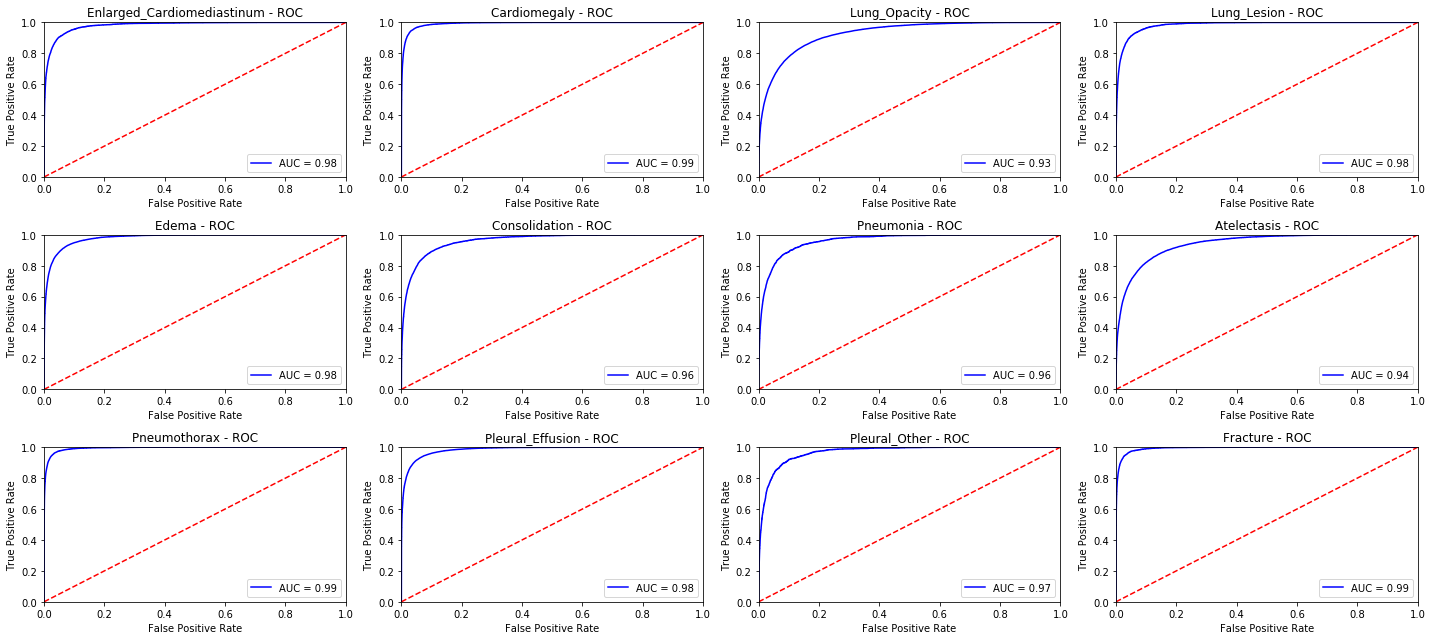

***** Precision / Recall *****


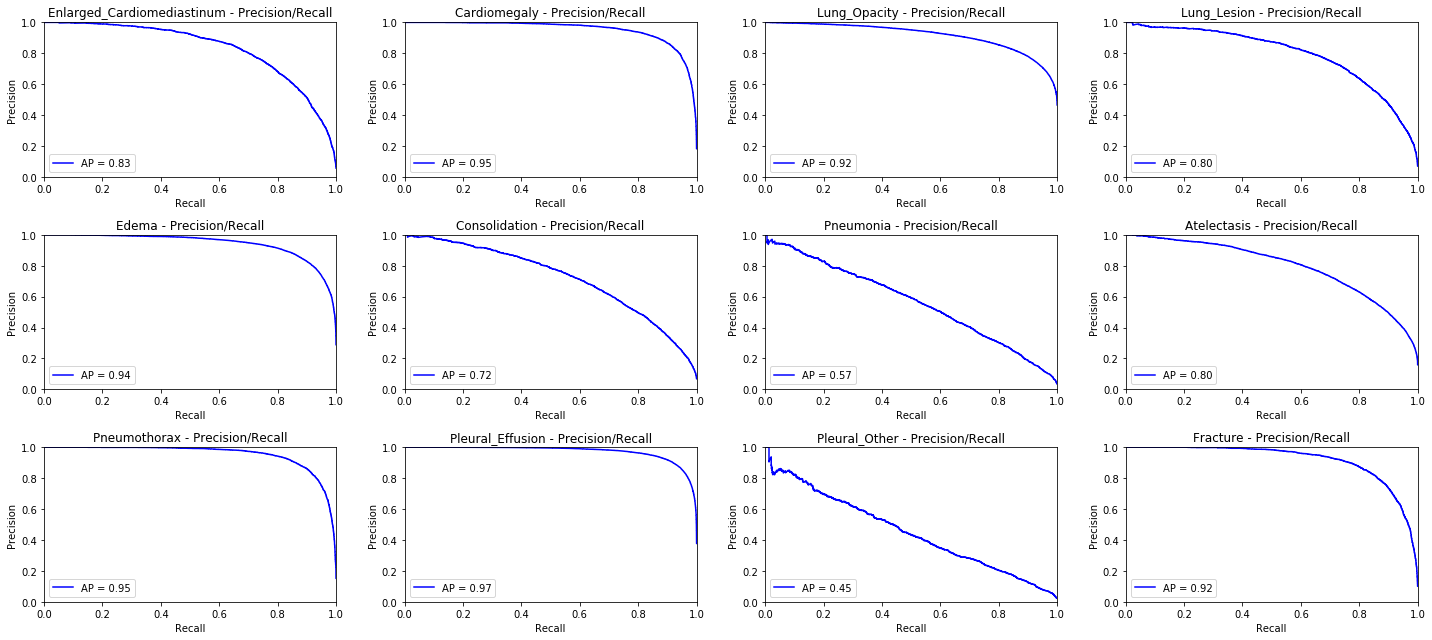


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.200190
Hamming Loss,0.131158
Combined Recall,0.323526
Combined Precision,0.356845
Combined F1,0.314879


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,1301,0.099154,0.125731,0.110872,0.594392,0.086383
1,Cardiomegaly,2994,0.336005,0.460412,0.388492,0.787671,0.387445
2,Lung_Opacity,11878,0.611130,0.584413,0.597473,0.676244,0.595490
3,Lung_Lesion,1089,0.091827,0.136799,0.109890,0.637839,0.078627
4,Edema,6191,0.418995,0.508528,0.459440,0.765833,0.479092
5,Consolidation,1602,0.026841,0.143333,0.045216,0.645264,0.101045
6,Pneumonia,700,0.012857,0.112500,0.023077,0.622081,0.047467
7,Atelectasis,4079,0.158372,0.243040,0.191777,0.602329,0.206288
8,Pneumothorax,2143,0.251517,0.315020,0.279709,0.742754,0.247244
9,Pleural_Effusion,8838,0.591084,0.666327,0.626454,0.820932,0.693207


***** ROC *****


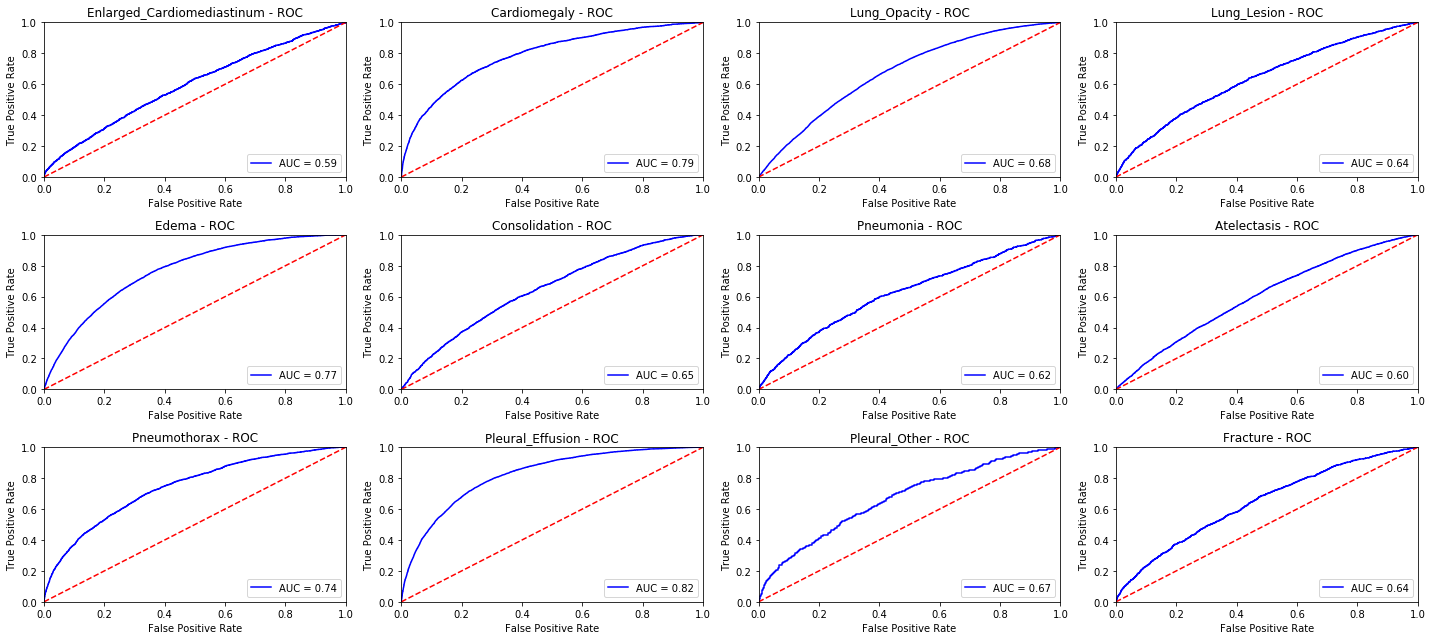

***** Precision / Recall *****


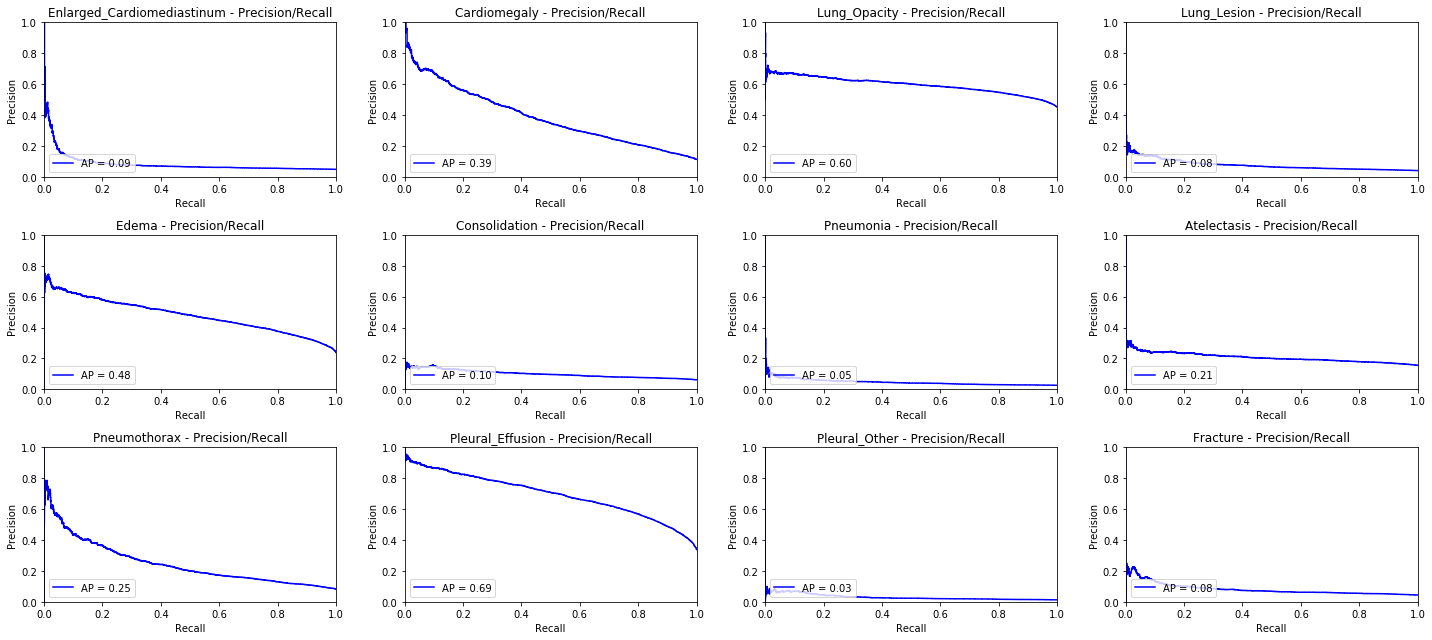

In [7]:
standardTraining.displayMetrics()